## Graph Representations Of Kmer Paths
Would be nice to visualize some paths of kmers in HMM 

In [1]:
import os
import numpy as np
import pandas as pd
from graphviz import Digraph

from rrna_analysis.plot_experiment_table import plot_acc_heatmap_for_experiment
from rrna_analysis.multiple_model_accuracy import plot_accuracy_vs_delta_and_accuracy_over_time, preprocess_accuracy_csv
from rrna_analysis.kmer_pos_mapping import KmerPosMapping
from rrna_analysis.kmer_pos_mapping import get_kmer_permutations

In [2]:
mods_csv = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/mod_file.csv"
reference = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/yeast_25S_18S.fa"
positions = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/yeast_18S_25S_variants.positions"
kpm = KmerPosMapping(reference, positions, mods_csv)

In [3]:
output_dir = "/Users/andrewbailey/CLionProjects/rrna_analysis/figures/graphs" 

In [8]:
def plot_kmer_path_graph(contig, strand, start, end, kpm, test_path=None):
    dot = Digraph(comment='Kmer Paths')
    dot.attr(rankdir='LR', size='8,5')
    canonical = set("ATGC")
    prev_nodes = {}
    counter = 0
    dotted = False
    skip = False
    for pos in range(start, end+1):
        nodes = {}
        kmers = kpm.get_reference_position_kmers(contig, strand, pos)
        kmers = sorted(list(kmers))
    #     if len(kmers) > 2:
    #         dotted = True
    #         skip = True
    #     else:
    #         if skip:
    #             skip = False
    #         else:
    #             dotted = False
        for kmer in kmers:
            dot.node(str(counter), kmer[::-1])
            nodes[str(counter)] = kmer[::-1]
            counter += 1

        n_allowed = np.log2(len(nodes))
        n_allowed2 = np.log2(len(prev_nodes))
        for prev_node, prev_kmer in prev_nodes.items():
            for node, kmer in nodes.items():
    #             print(prev_kmer, kmer)
    #             print(f"{kmer[:4]} == {prev_kmer[1:]}")
                if kmer[:4] == prev_kmer[1:]:
                    n_mods = len([x for x in list(kmer) if x not in canonical])
                    n_mods2 = len([x for x in list(prev_kmer) if x not in canonical])
                    if not (n_mods == 0 or n_mods == n_allowed):
                        dot.node(str(node), style="dotted")
                        print("next", prev_kmer, kmer, n_mods, n_allowed)
                        dot.edge(str(prev_node), str(node), style="dotted")
                    elif not (n_mods2 == 0 or n_mods2 == n_allowed2):
                        dot.node(str(prev_node), style="dotted")
                        print("prev", prev_kmer, kmer, n_mods2, n_allowed2)
                        dot.edge(str(prev_node), str(node), style="dotted")
                    else:
                        dot.edge(str(prev_node), str(node), style="bold")

        prev_nodes = nodes
    if test_path is not None:
        dot.format = 'svg'
        dot.render(test_path, view=False)  
    else:
        dot.render(test_path, view=True)  


In [20]:
contig = "RDN18-1"
strand = "+"

start = 1181
end = 1190

# start = 1261
# end = 1271

# contig = "RDN25-1"
# start = 639
# end = 650
# start = 205
# end = 211
# test_path = os.path.join(output_dir, f"{start}_{end}_depletion")
test_path = None

plot_kmer_path_graph(contig, strand, start, end, kpm=kpm, test_path=test_path)


next TTGAC TGACg 1 2.0
next TlGAC lGACT 1 2.0
prev lGACT GACTC 1 2.0
prev TGACg GACgC 1 2.0


/Users/andrewbailey/anaconda3/envs/signalalign/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log2


In [20]:
dot = Digraph(comment='Kmer Paths')
dot.attr(rankdir='LR', size='8,5')
dot.node("A", "A", style="dotted")

In [25]:
dot.node("A", style="bold")

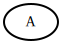

In [26]:
dot